#Scaling
This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.



In [33]:
import pandas as pd
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("diabetes.csv")

In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,0.194000,0.552663,0.558885,0.198626,0.081314,0.451627,0.150185,0.169833
1,0.286216,0.709836,0.580530,0.223881,0.118600,0.523734,0.201751,0.267786


# Can you tell me which is a right skewed, normal and left skewed distribution

In [45]:
df.groupby("Outcome").agg(['mean', 'median'])

Pregnancies             Glucose  ... DiabetesPedigreeFunction       Age       
               mean    median      mean  ...                   median      mean median
Outcome                                  ...                                          
0          0.194000  0.117647  0.552663  ...                 0.110162  0.169833   0.10
1          0.286216  0.235294  0.709836  ...                 0.158412  0.267786   0.25

[2 rows x 16 columns]

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
X = df.drop(["Outcome"], axis =1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
X_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

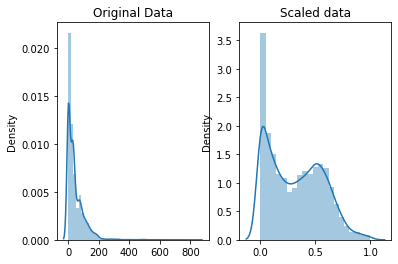

In [18]:
fig, ax=plt.subplots(1,2)
sns.distplot(X, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(X_scaled, ax=ax[1])
ax[1].set_title("Scaled data")

In [23]:
# Scaling those columns which have values greater than 1

scaleIt = MinMaxScaler()
columns_to_be_scaled = [c for c in df.columns if df[c].max() > 1]
print("The columns which are to be scaled are :",columns_to_be_scaled)

scaled_columns = scaleIt.fit_transform(df[columns_to_be_scaled])
scaled_columns = pd.DataFrame(scaled_columns, columns=columns_to_be_scaled)
scaled_columns['Outcome'] = df['Outcome'] 

The columns which are to be scaled are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [24]:

df=scaled_columns
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


# Handling Imbalanced data with SMOTE

In [28]:
# Another way of choosing x and y
x=df.iloc[:,:-1]
print(x)
y=df.iloc[:,-1:]
x.head(5),y.head(5)
print(y)

     Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
0       0.352941  0.743719  ...                  0.234415  0.483333
1       0.058824  0.427136  ...                  0.116567  0.166667
2       0.470588  0.919598  ...                  0.253629  0.183333
3       0.058824  0.447236  ...                  0.038002  0.000000
4       0.000000  0.688442  ...                  0.943638  0.200000
..           ...       ...  ...                       ...       ...
763     0.588235  0.507538  ...                  0.039710  0.700000
764     0.117647  0.613065  ...                  0.111870  0.100000
765     0.294118  0.608040  ...                  0.071307  0.150000
766     0.058824  0.633166  ...                  0.115713  0.433333
767     0.058824  0.467337  ...                  0.101196  0.033333

[768 rows x 8 columns]
     Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[76

In [38]:
#Split DATA
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 42)
x_train.shape

(614, 8)

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In this tutorial, you will discover the SMOTE for oversampling imbalanced classification datasets.

In [40]:
smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)
x_train.shape, y_train.shape


((802, 8), (802,))

In [50]:
x_train[0]

array([0.11764706, 0.42211055, 0.        , 0.        , 0.        ,
       0.        , 0.09649872, 0.        ])

In [48]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_std = scalar.fit_transform(x_train)
x_test_std = scalar.fit_transform(x_test)

In [49]:
x_train_std[0]

array([-0.59518774, -1.29277836, -3.7995245 , -1.29755233, -0.72264215,
       -4.40652992, -0.54122135, -1.13532092])

Populating the interactive namespace from numpy and matplotlib


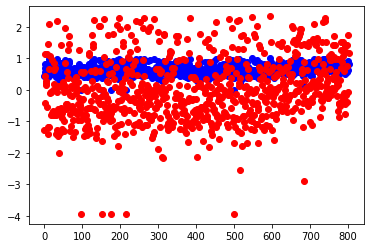

In [55]:
%pylab inline
xx = np.arange(len(x_train_std))
yy1 = x_train[:, 1]
yy2 = x_train_std[:, 1]
scatter(xx, yy1, color='b')
scatter(xx, yy2, color='r')